In [1]:
! pip install numpy h5py pandas

In [54]:
import h5py as h5  #for handling data format
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
Data_SSE  = h5.File('COMPAS_Output_SSE.h5')

In [4]:
list(Data_SSE.keys())

['Run_Details', 'SSE_Supernovae', 'SSE_System_Parameters']

In [5]:
SP_SSE = Data_SSE['SSE_System_Parameters']
list(SP_SSE.keys())

['Ang_Momentum',
 'CH_on_MS',
 'Evolution_Status',
 'Luminosity',
 'Mass',
 'Mass@ZAMS',
 'Mass_Env',
 'Metallicity@ZAMS',
 'Omega@ZAMS',
 'PO_LBV_Factor',
 'PO_Sigma_Kick_CCSN_BH',
 'PO_Sigma_Kick_CCSN_NS',
 'PO_Sigma_Kick_ECSN',
 'PO_Sigma_Kick_USSN',
 'PO_WR_Factor',
 'Radius@ZAMS',
 'Record_Type',
 'SEED',
 'SN_Kick_Magnitude_Random_Number',
 'Stellar_Type',
 'Stellar_Type@ZAMS',
 'Teff']

In [7]:
print(SP_SSE['Teff'].attrs['units']) # attrs refers to attributes
print(SP_SSE['Luminosity'].attrs['units'])

b'K'
b'Lsol'


In [8]:
L_SSE = SP_SSE['Luminosity'][()]
print(L_SSE.shape)                   # number of systems in this file
print(L_SSE[:5])                    # the values of the first 3 entries
T_SSE = SP_SSE['Teff'][()]
print(T_SSE.shape)                   # number of systems in this file
print(T_SSE[:5])                    # the values of the first 3 entries

(75000,)
[ 0.44208346  5.90186228 93.60656714  2.75878624  4.24579915]
(75000,)
[ 5378.08264143  7818.78582496 13344.80882652  6819.88165121
  7305.052703  ]


In [9]:
def restrict(df, col, lower_limit, upper_limit):
    mask = (df[col] >= lower_limit) & (df[col] <= upper_limit)
    return df[mask]

In [10]:
SSE_file = pd.DataFrame({
           'L': np.log10(L_SSE),
           'Teff': T_SSE,
           'M': SP_SSE['Mass'][()],
           'Z': SP_SSE['Metallicity@ZAMS'][()],
           'type': SP_SSE['Stellar_Type'][()]
})
SSE_file = restrict(SSE_file, 'type', 0, 1) #MS stars only

In [11]:
SSE_file.head(100).to_csv('SSE.txt', sep='\t', index=False)

In [48]:
with open('output_YBC.txt') as f:
    lines = f.readlines()
    labels = list(lines[0].split(" "))[:-1]
    df = []
    for i in range(1,len(lines)):
        if i%2:
            numbers_str = lines[i].split()
            x = np.array([float(num) for num in numbers_str])
            df.append(x)
    df = pd.DataFrame(df, columns=labels)
    df = df.apply(pd.to_numeric)

In [49]:
df.head(3)

,Label,F218W1,F225W1,F275W1,F336W,F390W,F438W,F475W,F555W,F606W,F625W,F775W,F814W,F105W,F110W,F125W,F140W,F160W
0,1.0,3.99349,3.89448,3.58062,3.15507,3.24678,3.21245,3.09936,2.98392,2.88692,2.82097,2.67112,2.65731,2.56845,2.53007,2.47433,2.42446,2.38483
1,1.0,-0.06302,-0.05861,-0.03155,0.14256,0.65616,0.81921,0.84038,0.86347,0.87586,0.88965,0.92681,0.93890,1.02817,1.03618,1.05166,1.06187,1.07303
2,1.0,5.58215,5.39683,4.80006,4.02378,4.24438,4.22924,4.04023,3.85279,3.68646,3.57937,3.32195,3.29296,3.13511,3.06536,2.97238,2.87473,2.79126


In [50]:
def convert_to_mag(L, BC_F, A_coeff):
    # ref: https://www.nature.com/articles/s41550-021-01597-5#Sec2
    M_bol = 4.74 - 2.5*np.log10(L)
    M_F = M_bol - BC_F
    return M_F +  A_coeff * 0.14 + 18.29 #E(B-V) + (m-M)

In [61]:
simul_mF814W_SSE = convert_to_mag(SSE_file.L, np.mean(df.F814W), 2.04)
simul_mF336W_SSE = convert_to_mag(SSE_file.L, np.mean(df.F336W), 5.16)

c:\Users\minji\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


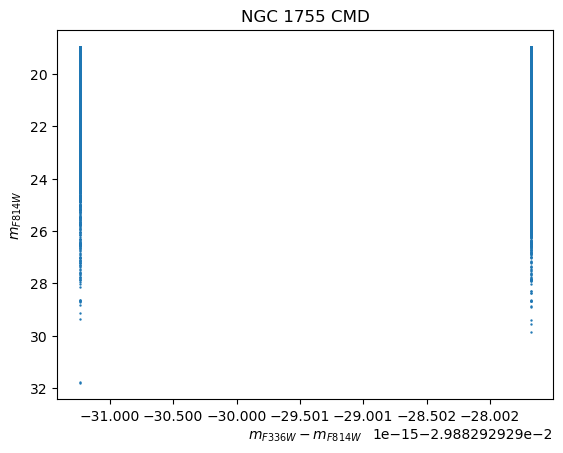

In [62]:
plt.scatter(simul_mF336W_SSE - simul_mF814W_SSE, simul_mF814W_SSE, s = 0.5)
plt.title('NGC 1755 CMD')
plt.xlabel(r'$m_{F336W}-m_{F814W}$')
plt.ylabel(r'$m_{F814W}$')
plt.gca().invert_yaxis()

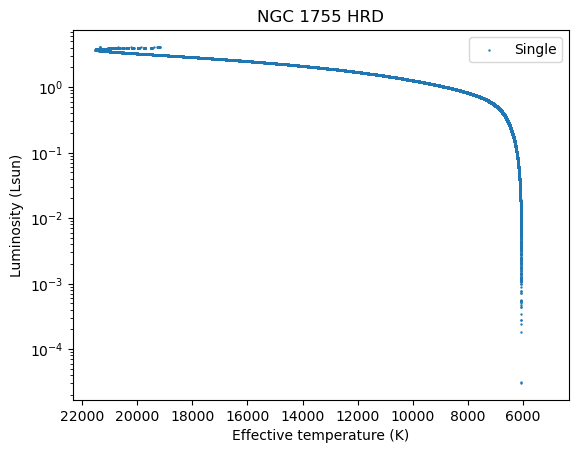

In [60]:
plt.scatter(SSE_file.Teff, SSE_file.L, label = 'Single', s = 0.5)
plt.gca().invert_xaxis()
plt.title('NGC 1755 HRD')
plt.xlabel('Effective temperature (K)')
plt.ylabel('Luminosity (Lsun)')
plt.yscale('log')
plt.legend()
